In [1]:
import pandas as pd
import re
from datetime import datetime

In [2]:
text = open("C:/Users/mynam/DataScience MLDL/Projects/whatsapp chat analyzer/jitchat.txt", "r",encoding="utf-8")

In [3]:
with open("C:/Users/mynam/DataScience MLDL/Projects/whatsapp chat analyzer/jitchat.txt", "r",encoding="utf-8") as f:
    chat_data = f.readlines()
chat_data = chat_data[1:]

In [2]:
path = "C:\\users\\mynam\\DataScience MLDL\\Projects\\whatsapp chat analyzer\\allchats\\mysideclgchat.txt"
with open(path, "r",encoding="utf-8") as f:
    data = f.readlines()
data = data[1:]
pattern = r"^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?[APMapm]{2}) - ([^:]+): (.*)"
messages = []
current_message = ""
for line in data:
    if re.match(pattern, line):
        if current_message:
            messages.append(current_message.strip())
        current_message = line
    else:
        current_message += line
if current_message:
    messages.append(current_message.strip())

dataa = []
for msg in messages:
    match = re.match(pattern, msg)
    if match:
        date_str, time_str, sender, message = match.groups()
        try:
            timestamp = datetime.strptime(f"{date_str} {time_str}", "%m/%d/%y %I:%M %p")
        except ValueError:
            try:
                timestamp = datetime.strptime(f"{date_str} {time_str}", "%d/%m/%Y %I:%M %p")
            except:
                continue
        dataa.append({
            "datetime": timestamp,
            "User": sender.strip(),
            "message": message.strip()
        })
    # else: it's a system message — safely ignored now

# Step 3: Create DataFrame
df = pd.DataFrame(dataa)

In [11]:
from collections import Counter
with open("C:\\Users\\mynam\\DataScience MLDL\\Projects\\whatsapp chat analyzer\\hinglish_stopwords.txt", 'r') as f:
        stop_words = f.read().splitlines()
words = []
for mess in df[df["User"]=="Monalisa"]['message']:
    for word in mess.lower().split():
        if word not in stop_words and word not in {"(file", "attached)", ","}:
            words.append(word)
            
pd.DataFrame(Counter(words).most_common(20))

""


In [42]:
with open("C:/Users/mynam/DataScience MLDL/Projects/whatsapp chat analyzer/tathachat.txt", "r",encoding="utf-8") as f:
    data = f.readlines()
data = data[1:]
pattern = r"^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?[APMapm]{2}) - ([^:]+): (.*)"
messages = []
current_message = ""
for line in data:
    if re.match(pattern, line):
        if current_message:
            messages.append(current_message.strip())
        current_message = line
    else:
        current_message += line
if current_message:
    messages.append(current_message.strip())

dataa = []
for msg in messages:
    match = re.match(pattern, msg)
    if match:
        date_str, time_str, sender, message = match.groups()
        try:
            timestamp = datetime.strptime(f"{date_str} {time_str}", "%m/%d/%y %I:%M %p")
        except ValueError:
            try:
                timestamp = datetime.strptime(f"{date_str} {time_str}", "%d/%m/%Y %I:%M %p")
            except:
                continue
        dataa.append({
            "datetime": timestamp,
            "User": sender.strip(),
            "message": message.strip()
        })
    # else: it's a system message — safely ignored now

# Step 3: Create DataFrame
df = pd.DataFrame(dataa)
df

""


In [46]:
messages

['02/08/2022, 11:08 - Sakangsa CR created group "CSE-DS 2021-2025"\n07/09/2022, 16:46 - Sourav Singh CR added you\n08/09/2022, 13:22 - +91 98316 40627: Nikhil Kumar Singh roll 64 is unable to attend classes as he is suffering from malaria\n08/09/2022, 20:32 - Saptami Ma\'am ( Maths ): This message was deleted\n08/09/2022, 23:57 - Your security code with ~\u202fMukul changed. Tap to learn more.\n12/09/2022, 19:46 - +91 98306 04711: CA means Continuous Evaluation so every test and Assignment is equally important.\n13/09/2022, 00:45 - +91 98306 04711: Dear Students as requested by you tomorrow\'s mock test is rescheduled on 15th September,2022.\n13/09/2022, 09:55 - Your security code with Chandan Cse Ds changed. Tap to learn more.\n13/09/2022, 13:13 - +91 98306 04711: I don\'t understand why the stream change students did not attend today\'s classes.\n13/09/2022, 13:19 - +91 99034 41444: Tomorrow communication class at 9:30am\n13/09/2022, 13:33 - +91 98316 40627: College has suspended all

In [4]:
chat_data[2]

'5/2/23, 9:43\u202fPM - Jit Mckv: CA3 for DAA will be taken next Wednesday, from 9.40-10.10 am. \n'

In [5]:
pattern = r"^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?[APMapm]{2}) - ([^:]+): (.*)"

In [7]:
m = re.match(pattern, chat_data[4])
print(m)

None


In [10]:
messages = []
current_message = ""
for line in chat_data:
    if re.match(pattern, line):
        if current_message:
            messages.append(current_message.strip())
        current_message = line
    else:
        current_message += line
if current_message:
    messages.append(current_message.strip())


In [12]:
messages[:30]

['2/10/23, 8:12\u202fPM - Pritush Singh: https://m.twitch.tv/onisuna',
 '3/2/23, 2:33\u202fPM - Pritush Singh: <Media omitted>',
 "5/2/23, 9:43\u202fPM - Jit Mckv: CA3 for DAA will be taken next Wednesday, from 9.40-10.10 am. \nAll graph related algorithms and explanations with examples will be there in the test. For example BFS, DFS, Prim, Kruskal, Dijkastra, Floyd Worshall, Ford Fulkerson, Topological sort,etc...A graph or adjacency matrix will be provided. \nFew students will answer one question as a group\n*There will be 7-8 questions*\nPlease bring A4 sheets.\nRoll no division for each group will be provided by ma'am on that day itself.",
 '8/24/23, 9:06\u202fPM - Pritush Singh: <Media omitted>',
 '8/24/23, 9:06\u202fPM - Pritush Singh: <Media omitted>',
 '8/27/23, 9:39\u202fPM - Jit Mckv: <Media omitted>',
 '8/28/23, 8:14\u202fPM - Jit Mckv: <Media omitted>',
 '8/28/23, 8:15\u202fPM - Jit Mckv: <Media omitted>',
 '8/28/23, 8:15\u202fPM - Jit Mckv: <Media omitted>',
 '8/28/23, 8:1

In [37]:
data = []
for msg in messages:
    match = re.match(pattern, msg)
    if match:
        date_str, time_str, sender, message = match.groups()
        try:
            timestamp = datetime.strptime(f"{date_str} {time_str}", "%m/%d/%y %I:%M %p")
        except ValueError:
            try:
                timestamp = datetime.strptime(f"{date_str} {time_str}", "%d/%m/%Y %I:%M %p")
            except:
                continue
        data.append({
            "datetime": timestamp,
            "sender": sender.strip(),
            "message": message.strip()
        })
    # else: it's a system message — safely ignored now

# Step 3: Create DataFrame
df = pd.DataFrame(data)
df.head(20)

,datetime,sender,message
0,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna
1,2023-03-02 14:33:00,Pritush Singh,<Media omitted>
2,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from..."
3,2023-08-24 21:06:00,Pritush Singh,<Media omitted>
4,2023-08-24 21:06:00,Pritush Singh,<Media omitted>
5,2023-08-27 21:39:00,Jit Mckv,<Media omitted>
6,2023-08-28 20:14:00,Jit Mckv,<Media omitted>
7,2023-08-28 20:15:00,Jit Mckv,<Media omitted>
8,2023-08-28 20:15:00,Jit Mckv,<Media omitted>
9,2023-08-28 20:15:00,Jit Mckv,<Media omitted>


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19602 entries, 0 to 19601
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  19602 non-null  datetime64[ns]
 1   sender    19602 non-null  object        
 2   message   19602 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 459.6+ KB


In [15]:
df['Year'] = df['datetime'].dt.year

In [16]:
df.head()

,datetime,sender,message,Year
0,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna,2023
1,2023-03-02 14:33:00,Pritush Singh,<Media omitted>,2023
2,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023
3,2023-08-24 21:06:00,Pritush Singh,<Media omitted>,2023
4,2023-08-24 21:06:00,Pritush Singh,<Media omitted>,2023


In [17]:
df['month'] = df['datetime'].dt.month_name()

In [18]:
df.head()

,datetime,sender,message,Year,month
0,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna,2023,February
1,2023-03-02 14:33:00,Pritush Singh,<Media omitted>,2023,March
2,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May
3,2023-08-24 21:06:00,Pritush Singh,<Media omitted>,2023,August
4,2023-08-24 21:06:00,Pritush Singh,<Media omitted>,2023,August


In [ ]:
df['day'] = df['datetime'].dt.day
df['day_name'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
df['minutes'] = df['datetime'].dt.minute

In [23]:
words =[]
for message in df["message"]:
    words.extend(message.split())

In [24]:
from urlextract import URLExtract
extractor = URLExtract() # it returns the url from a given string
url = extractor.find_urls("www.h.com jjuniwunvunwuf iunfvun www.google.com iauvubcv")
url

['www.h.com', 'www.google.com']

In [25]:
links = []
for message in df["message"]:
    links.extend(extractor.find_urls(message))

In [26]:
len(links)

929

In [27]:
df.shape

(19602, 9)

In [28]:
df[df.message=="<Media omitted>"].shape

(2029, 9)

<Axes: xlabel='sender'>

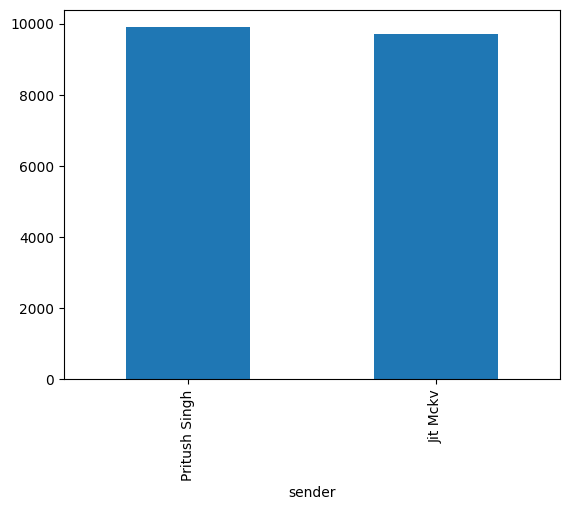

In [29]:
df.sender.value_counts().head().plot(kind='bar')

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
x = df.sender.value_counts().head()
name = x.index
count = x.values

([0, 1], [Text(0, 0, 'Pritush Singh'), Text(1, 0, 'Jit Mckv')])

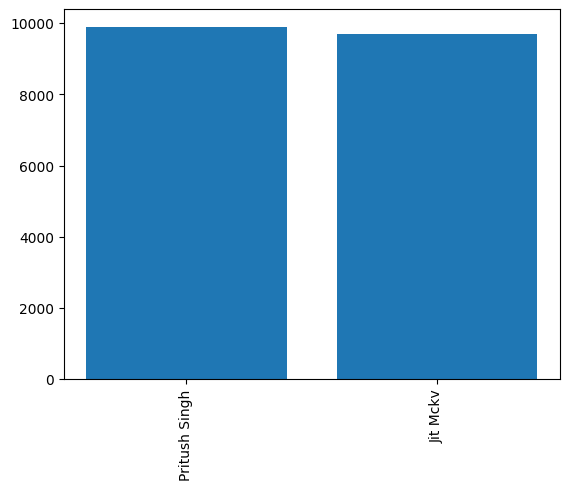

In [32]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')

In [33]:
round((df.sender.value_counts()/df.shape[0])*100,2).reset_index().rename(columns= {'index':'Name','count':'Percent'})

,sender,Percent
0,Pritush Singh,50.49
1,Jit Mckv,49.51


In [34]:
df[df.message=="<Media omitted>"].shape

(2029, 9)

In [35]:
media_omitted_df = df[df.message!="<Media omitted>"]
media_omitted_df.shape

(17573, 9)

In [36]:
media_omitted_df["sender"].unique()

array(['Pritush Singh', 'Jit Mckv'], dtype=object)

In [134]:
f = open("../hinglish_stopwords.txt",'r')
stop_words = f.read()
# print(stop_words)

In [135]:
words = []
for mess in media_omitted_df["message"]:
    for word in mess.lower().split():
        if word not in stop_words:
            if (word != "(file") & (word!= "attached)") & (word != ","):
                words.append(word)

In [137]:
words[:20]

['https://m.twitch.tv/onisuna',
 'https://m.twitch.tv/onisuna',
 'ca3',
 'daa',
 'wednesday,',
 '9.40-10.10',
 'am.',
 'ca3',
 'daa',
 'wednesday,',
 '9.40-10.10',
 'am.',
 'ca3',
 'daa',
 'wednesday,',
 '9.40-10.10',
 'am.',
 'ca3',
 'daa',
 'wednesday,']

In [ ]:
# remove grp message 
# remove midea omitted messqges
# remove stop words

In [ ]:
#words = []
#for w in df["Messages"]:
 #   words.extend(w.split())

In [138]:
from collections import Counter
Counter(words)

Counter({'nehi': 2439,
         'khelega': 566,
         'liyo': 540,
         'data': 489,
         'noice': 456,
         'bhej': 416,
         'bass': 409,
         'baat': 384,
         'kahe': 381,
         'khel': 361,
         'match': 356,
         'tatha': 314,
         'goal': 310,
         'kese': 294,
         'aja': 279,
         'matlab': 277,
         'padega': 266,
         'hamko': 262,
         'dear': 257,
         'import': 256,
         'kaam': 246,
         'hena': 246,
         'dena': 246,
         'pass': 243,
         'padh': 238,
         'tereko': 237,
         'humko': 236,
         'samjh': 232,
         'game': 228,
         'message': 224,
         'khelenge': 221,
         'usko': 218,
         'jaldi': 211,
         'code': 205,
         'nice': 204,
         'phir': 201,
         'model': 201,
         'project': 201,
         'weather': 197,
         'link': 195,
         'pandas': 194,
         'shayad': 192,
         'puch': 192,
         'pd': 192

In [139]:
pd.DataFrame(Counter(words).most_common(25))

,0,1
0,nehi,2439
1,khelega,566
2,liyo,540
3,data,489
4,noice,456
5,bhej,416
6,bass,409
7,baat,384
8,kahe,381
9,khel,361


In [141]:
import emoji

In [142]:
emojis = []
for mm in media_omitted_df["message"]:
    emojis.extend([c for c in mm if c in emoji.EMOJI_DATA])

In [144]:
emojis[:20]

['😌',
 '😌',
 '🥲',
 '🥲',
 '🥲',
 '🥲',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥']

In [145]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🤣,288
1,😌,200
2,🙂,160
3,🥲,142
4,🔥,126
5,🤡,86
6,💀,60
7,📸,45
8,🏻,28
9,🫡,22


In [146]:
media_omitted_df.columns

Index(['datetime', 'sender', 'message', 'Year', 'month', 'day', 'day_name',
       'hour', 'minutes'],
      dtype='object')

In [147]:
media_omitted_df['month_num'] = media_omitted_df['datetime'].dt.month

C:\Users\mynam\AppData\Local\Temp\ipykernel_15576\1176927480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_omitted_df['month_num'] = media_omitted_df['datetime'].dt.month


In [160]:
media_omitted_df.head()

,datetime,sender,message,Year,month,day,day_name,hour,minutes,month_num,only_date
0,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna,2023,February,10,Friday,20,12,2,2023-02-10
1,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna,2023,February,10,Friday,20,12,2,2023-02-10
4,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02
5,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02
6,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02


In [149]:
media_omitted_df.groupby(["Year","month_num"]).count()["message"]

Year  month_num
2023  2               2
      5               7
      8               8
      9            1979
      10           2384
      11           1500
      12           2973
2024  1            1072
      2             868
      3            1673
      4            2302
      5            2597
      6            1598
      7            3627
      8            2950
      9            1902
      10           1579
      11            992
      12            619
2025  1            1000
      2             679
      3             445
      4            2239
      5            2165
Name: message, dtype: int64

In [151]:
media_omitted_df.groupby(["Year","month_num","month"]).count()["message"].reset_index()

,Year,month_num,month,message
0,2023,2,February,2
1,2023,5,May,7
2,2023,8,August,8
3,2023,9,September,1979
4,2023,10,October,2384
5,2023,11,November,1500
6,2023,12,December,2973
7,2024,1,January,1072
8,2024,2,February,868
9,2024,3,March,1673


In [152]:
timeline = media_omitted_df.groupby(["Year","month_num","month"]).count()["message"].reset_index()

In [153]:
timeline

,Year,month_num,month,message
0,2023,2,February,2
1,2023,5,May,7
2,2023,8,August,8
3,2023,9,September,1979
4,2023,10,October,2384
5,2023,11,November,1500
6,2023,12,December,2973
7,2024,1,January,1072
8,2024,2,February,868
9,2024,3,March,1673


In [154]:
tim = []
for i in range(timeline.shape[0]):
    tim.append(timeline['month'][i]+"-"+str(timeline["Year"][i]))

In [155]:
tim

['February-2023',
 'May-2023',
 'August-2023',
 'September-2023',
 'October-2023',
 'November-2023',
 'December-2023',
 'January-2024',
 'February-2024',
 'March-2024',
 'April-2024',
 'May-2024',
 'June-2024',
 'July-2024',
 'August-2024',
 'September-2024',
 'October-2024',
 'November-2024',
 'December-2024',
 'January-2025',
 'February-2025',
 'March-2025',
 'April-2025',
 'May-2025']

In [156]:
timeline['time'] = tim

In [157]:
timeline

,Year,month_num,month,message,time
0,2023,2,February,2,February-2023
1,2023,5,May,7,May-2023
2,2023,8,August,8,August-2023
3,2023,9,September,1979,September-2023
4,2023,10,October,2384,October-2023
5,2023,11,November,1500,November-2023
6,2023,12,December,2973,December-2023
7,2024,1,January,1072,January-2024
8,2024,2,February,868,February-2024
9,2024,3,March,1673,March-2024


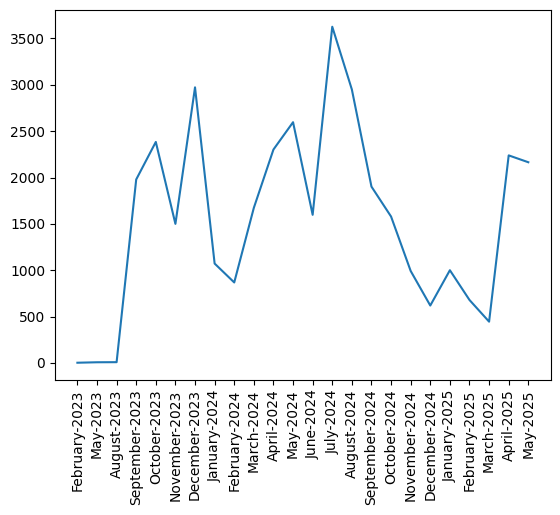

In [158]:
plt.plot(timeline["time"],timeline["message"])
plt.xticks(rotation = "vertical")
plt.show()

In [159]:
# daily timeline
media_omitted_df["only_date"]=media_omitted_df["datetime"].dt.date

C:\Users\mynam\AppData\Local\Temp\ipykernel_15576\262335476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_omitted_df["only_date"]=media_omitted_df["datetime"].dt.date


In [161]:
daily_timeline = media_omitted_df.groupby("only_date").count()["message"].reset_index()

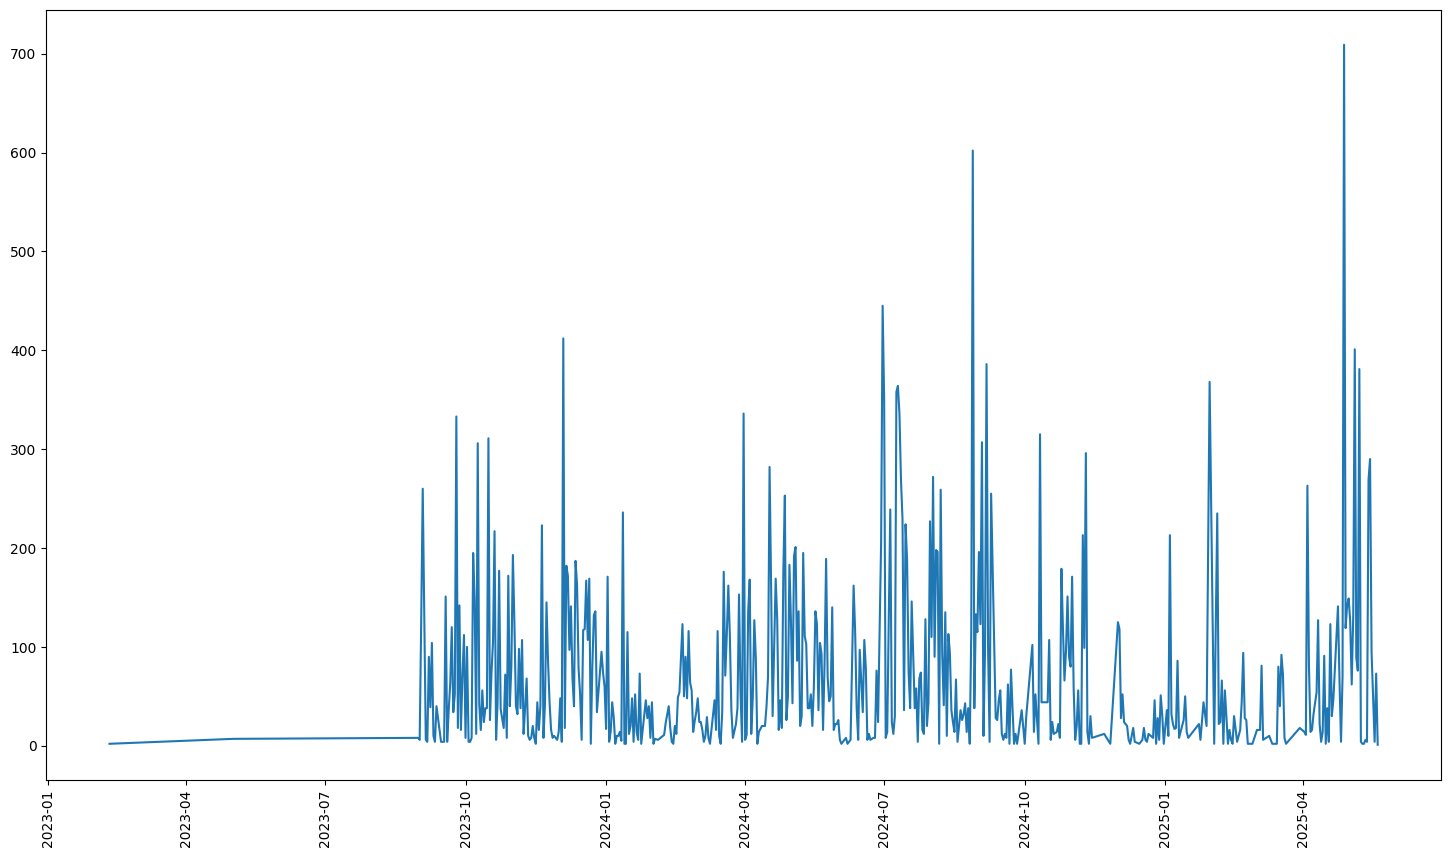

In [163]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline["only_date"],daily_timeline["message"])
plt.xticks(rotation = "vertical")
plt.show()

In [164]:
media_omitted_df.head()

,datetime,sender,message,Year,month,day,day_name,hour,minutes,month_num,only_date
0,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna,2023,February,10,Friday,20,12,2,2023-02-10
1,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna,2023,February,10,Friday,20,12,2,2023-02-10
4,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02
5,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02
6,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02


In [165]:
media_omitted_df["day_name"].value_counts()

day_name
Monday       6759
Friday       6323
Thursday     5406
Wednesday    5085
Sunday       4786
Tuesday      4491
Saturday     4310
Name: count, dtype: int64

In [166]:
media_omitted_df["hour"].unique()

array([20, 21, 13, 14, 16,  7, 22, 23,  1, 15, 17,  0, 11, 12, 19,  4,  9,
       10,  8,  2, 18,  6,  3,  5])

In [168]:
period = []
for hour in media_omitted_df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

media_omitted_df['period'] = period

C:\Users\mynam\AppData\Local\Temp\ipykernel_15576\1429763890.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_omitted_df['period'] = period


In [169]:
media_omitted_df.head()

,datetime,sender,message,Year,month,day,day_name,hour,minutes,month_num,only_date,period
0,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna,2023,February,10,Friday,20,12,2,2023-02-10,20-21
1,2023-02-10 20:12:00,Pritush Singh,https://m.twitch.tv/onisuna,2023,February,10,Friday,20,12,2,2023-02-10,20-21
4,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02,21-22
5,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02,21-22
6,2023-05-02 21:43:00,Jit Mckv,"CA3 for DAA will be taken next Wednesday, from...",2023,May,2,Tuesday,21,43,5,2023-05-02,21-22


In [172]:
def activity_heatmap(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['sender'] == selected_user]

    user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

    return user_heatmap

In [173]:
activity_heatmap("Jit Mckv", media_omitted_df)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,2-3,20-21,21-22,22-23,23-00,3-4,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,406.0,76.0,54.0,92.0,165.0,177.0,177.0,238.0,44.0,39.0,...,4.0,78.0,346.0,179.0,550.0,0.0,4.0,6.0,22.0,78.0
Monday,361.0,113.0,65.0,214.0,69.0,224.0,214.0,197.0,225.0,13.0,...,0.0,250.0,538.0,567.0,277.0,0.0,2.0,4.0,8.0,29.0
Saturday,373.0,96.0,54.0,84.0,50.0,86.0,129.0,113.0,158.0,23.0,...,0.0,193.0,132.0,169.0,313.0,2.0,0.0,0.0,2.0,4.0
Sunday,220.0,42.0,72.0,125.0,378.0,318.0,118.0,112.0,38.0,30.0,...,2.0,175.0,239.0,92.0,364.0,0.0,0.0,2.0,2.0,8.0
Thursday,421.0,36.0,87.0,98.0,196.0,112.0,118.0,200.0,29.0,27.0,...,0.0,134.0,344.0,341.0,266.0,0.0,0.0,0.0,32.0,8.0
Tuesday,202.0,112.0,24.0,109.0,44.0,58.0,167.0,74.0,68.0,97.0,...,0.0,142.0,194.0,161.0,430.0,0.0,0.0,4.0,8.0,34.0
Wednesday,618.0,154.0,92.0,29.0,48.0,74.0,157.0,91.0,25.0,19.0,...,4.0,122.0,369.0,227.0,293.0,0.0,0.0,6.0,20.0,16.0
